In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice, cycle
from torch.utils.data.dataset import random_split
from sklearn.neighbors import NearestNeighbors
from numpy.random import default_rng
import os.path as path
rng = default_rng()
device = torch.device("cuda:0" if True else "cpu")

In [2]:
def roundrobin(*iterables):
    "roundrobin('ABC', 'D', 'EF') --> A D E B F C"
    # Recipe credited to George Sakkis
    num_active = len(iterables)
    nexts = cycle(iter(it).__next__ for it in iterables)
    while num_active:
        try:
            for next in nexts:
                yield next()
        except StopIteration:
            # Remove the iterator we just exhausted from the cycle.
            num_active -= 1
            nexts = cycle(islice(nexts, num_active))

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [3]:
# class AutoEncoder(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(28*28, 100, bias=True)
#         self.fc2 = nn.Linear(100, CODING_DIM, bias=True)
#         self.fc3 = nn.Linear(CODING_DIM, 100, bias=True)
#         self.fc4 = nn.Linear(100, 28*28, bias=True)
#         self.bn = nn.BatchNorm1d(num_features=30, affine=False)
#
#     def encode(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.bn(self.fc2(x)))
#         return x
#
#     def decode(self, x):
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = x.view(-1, 1, 28, 28)
#         return x
#
#     def forward(self, x):
#         x = self.encode(x)
#         x = self.decode(x)
#         return x
#
# ae = AutoEncoder()
# ae_path = 'autoencoder_dict.pkl'
# if path.exists(ae_path) and not REFIT_AE:
#     state_dict = torch.load(ae_path)
#     ae.load_state_dict(state_dict)
#
# if REFIT_AE or not path.exists(ae_path):
#     autoencoder_dataset = torchvision.datasets.MNIST(root='./data', train=True,
#                                             download=True, transform=transforms.ToTensor())
#     ae_testset = torchvision.datasets.MNIST(root='./data', train=False,
#                                             download=True, transform=transforms.ToTensor())
#     ae_trainloader = torch.utils.data.DataLoader(autoencoder_dataset, batch_size=32,
#                                               shuffle=True)
#     ae_testloader = torch.utils.data.DataLoader(ae_testset, batch_size=128,
#                                               shuffle=False)
#     ae_criterion = nn.MSELoss()
#     ae_optimizer = optim.SGD(ae.parameters(), lr=0.1, momentum=0.5)
#
#     total_time = 0
#     true_epoch = 0
#

In [4]:
# if REFIT_AE or not path.exists(ae_path):
#     with WindowsInhibitor():
#         ae.to(device)
#         for epoch in range(60):  # loop over the dataset multiple times
#             ae.train()
#             start_time = time.time()
#             true_epoch += 1
#             running_loss = 0.0
#             epoch_loss = 0.0
#             running_ortho_loss = 0.0
#             running_discont_loss = 0.0
#             true_train_total = 0.0
#             total_train = 0.0
#             for i, data in enumerate(ae_trainloader, 0):
#                 # get the inputs
#                 inputs, _ = data
#                 inputs = inputs.to(device)
#                 # zero the parameter gradients
#                 ae_optimizer.zero_grad()
#
#                 # forward + backward + optimize
#                 outputs = ae(inputs)
#
#                 loss = ae_criterion(outputs, inputs)
#                 running_loss += loss.detach()
#                 epoch_loss += loss.detach()
#
#                 total_train += 1
#                 true_train_total += 1
#
#                 loss.backward()
#                 ae_optimizer.step()
#
#                 # with torch.no_grad():
#                 #     print(net.fc1.weight.det())
#                     # net.fc1.weight /= torch.abs(net.fc1.weight.det()) ** (1 / (28 * 28))
#                 ae_optimizer.zero_grad()
#                 # print(f'loss: {running_loss / total_train:.4f}')
#                 # print statistics
#                 if i % 250 == 249:    # print every 25 mini-batches
#                     print(f'[{true_epoch}, {i + 1}] '
#                           f'loss: {running_loss / total_train:.4f}')
#                     running_loss = 0.0
#                     running_ortho_loss = 0.0
#                     running_discont_loss = 0.0
#                     total_train = 0.0
#             print(f'Epoch {true_epoch} total error = {epoch_loss / true_train_total:.4f}')
#             test_error = 0.0
#             total = 0
#             with torch.no_grad():
#                 ae.eval()
#                 for data in ae_testloader:
#                     images, _ = data
#                     images= images.to(device)
#                     outputs = ae(images)
#                     test_loss = ae_criterion(outputs, images)
#                     total += 1
#                     test_error += test_loss.detach()
#
#             total_time += time.time() - start_time
#             print(f'Error on the 10000 test images: {test_error / total}')
#             print(f'Finished epoch, cumulative time: {total_time}s')
#         print("Finished training!")
#         torch.save(ae.state_dict(), ae_path)


Preventing Windows from going to sleep
[1, 250] loss: 0.0977
[1, 500] loss: 0.0806
[1, 750] loss: 0.0714
[1, 1000] loss: 0.0675
[1, 1250] loss: 0.0642
[1, 1500] loss: 0.0618
[1, 1750] loss: 0.0601
Epoch 1 total error = 0.0710
Error on the 10000 test images: 0.05696236342191696
Finished epoch, cumulative time: 10.522501468658447s
[2, 250] loss: 0.0566
[2, 500] loss: 0.0553
[2, 750] loss: 0.0536
[2, 1000] loss: 0.0528
[2, 1250] loss: 0.0513
[2, 1500] loss: 0.0509
[2, 1750] loss: 0.0493
Epoch 2 total error = 0.0525
Error on the 10000 test images: 0.046932119876146317
Finished epoch, cumulative time: 19.210458993911743s
[3, 250] loss: 0.0476
[3, 500] loss: 0.0469
[3, 750] loss: 0.0459
[3, 1000] loss: 0.0448
[3, 1250] loss: 0.0442
[3, 1500] loss: 0.0436
[3, 1750] loss: 0.0431
Epoch 3 total error = 0.0450
Error on the 10000 test images: 0.04100566729903221
Finished epoch, cumulative time: 27.963459014892578s
[4, 250] loss: 0.0423
[4, 500] loss: 0.0418
[4, 750] loss: 0.0408
[4, 1000] loss: 0.

In [5]:
# ae.eval()
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

classes = list(range(10))
trainsets = [torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor()) for _ in classes]
for i, trainset in zip(classes, trainsets):
    idx = trainset.train_labels == i
    trainset.targets = trainset.targets[idx]
    trainset.data = trainset.data[idx]
# print(len(trainset))
# testset = torchvision.datasets.MNIST(root='./data', train=False,
#                                        download=True, transform=transforms.ToTensor())
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False,num_workers=2)
# print(len(random_split(trainset,(10000,50000))[1]))

C:\Users\Work\Anaconda3\envs\Conda_test\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [6]:
neighbor_data = {i: np.array([list(x.view(-1).numpy()) for x, _ in trainset]) for i, trainset in zip(classes, trainsets)}
neighbors = {i: NearestNeighbors(n_neighbors=2, n_jobs=6) for i in classes}

for i in classes:
    neighbors[i].fit(neighbor_data[i])

def get_neighbors(data, neighbors, data_points, labels, k=0):
    label = int(labels[0])
    with torch.no_grad():
        # print(neighbors[label])
        # print(neighbors[label].kneighbors(data_points.cpu().view(-1, 28*28)))
        nb_indices = neighbors[label].kneighbors(data_points.cpu().view(-1, 28*28))[1]
        nb_indices = nb_indices[:, k]
        out_tensor = torch.tensor(data[label][nb_indices].reshape((-1, 1, 28, 28)), dtype=torch.float)
        out_tensor.requires_grad = False
    return out_tensor

In [21]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 28*28, bias=False)
        # self.trans = torch.diag(torch.tensor([-1 if k < 28*28/2 else 1 for k in range(28*28)], dtype=torch.float))
        # self.trans = torch.diag(torch.tensor([-1 if i < 28 * 28 / 2 else 1 for i in range(28 * 28)],
        #                                      dtype=torch.float, requires_grad=False))
        self.trans = torch.block_diag(*[torch.tensor([[0, 1], [1, 0]], dtype=torch.float) for _ in range(28 * 28 // 2)])
        # torch.nn.init.uniform_(self.fc1.weight, -10 ** -4, 10 ** -4)
        # self.fc1.weight += torch.eye(28, 28).view(-1)


    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        # y = x

        x = F.linear(x, self.trans)

        # y = F.linear(y, self.fc1.weight.t())
        x = F.linear(x, self.fc1.weight.t())

        # y = y.view(-1, 1, 28, 28)
        x = x.view(-1, 1, 28, 28)
        return x #, y

def init_weights(m):
    if type(m) == nn.Linear:
        # torch.nn.init.uniform_(m.weight, -10 ** -4, 10 ** -4)
        torch.nn.init.orthogonal_(m.weight)
        # with torch.no_grad():
        #     m.weight += torch.eye(28 * 28)


net = Net()
net.apply(init_weights)
total_time = 0
true_epoch = 0
train_error_list = []
test_error_list = []


In [22]:
# state_dict = torch.load('symmetry_net.pkl')
# net.load_state_dict(state_dict)

In [23]:

trainloaders = [torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, pin_memory=True) for trainset in trainsets]
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.03, momentum=0.5, weight_decay=0)

In [37]:
net.to(device)
net.trans = net.trans.to(device)
id_mat = torch.eye(28 * 28, requires_grad=False, device=device)
convolver = torch.tensor([[1,  0],
                          [0, -1]], requires_grad= False, device=device, dtype=torch.float)
convolver = convolver.view([1, 1, 2, 1, 2])
for epoch in range(20):  # loop over the dataset multiple times
    start_time = time.time()
    true_epoch += 1
    running_loss = 0.0
    epoch_loss = 0.0
    running_ortho_loss = 0.0
    running_discont_loss = 0.0
    true_train_total = 0.0
    total_train = 0.0
    for i, data in enumerate(roundrobin(*trainloaders), 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(outputs)

        nbs = get_neighbors(neighbor_data, neighbors, outputs.detach(), labels, k=0).to(device)
        # print(type(outputs), type(nbs))
        loss = criterion(outputs, nbs)
        running_loss += loss.detach()
        epoch_loss += loss.detach()

        orth_loss = criterion(net.fc1.weight.t() @ net.fc1.weight, id_mat) * 10_000
        running_ortho_loss += orth_loss.detach()

        loss += orth_loss

        # DISC_LOSS_ADJ = 100
        # linear_map = (net.fc1.weight.t() @ net.trans @ net.fc1.weight).view(28, 28, 28, 28)
        # horiz_view = linear_map.view(28, 1, 28, 28, 28)
        # discont_loss = torch.sum(F.conv3d(horiz_view, convolver) ** 2 / (28 ** 2 * 27 ** 2)) * DISC_LOSS_ADJ
        # # print(discont_loss.detach())
        # vert_view = linear_map.permute(1, 0, 3, 2).view(28, 1, 28, 28, 28)
        # discont_loss += torch.sum(F.conv3d(vert_view, convolver) ** 2 / (28 ** 2 * 27 ** 2)) * DISC_LOSS_ADJ
        # running_discont_loss += discont_loss.detach()
        # loss += discont_loss
        # print(loss.detach(), orth_loss.detach())
        total_train += 1
        true_train_total += 1

        loss.backward()
        optimizer.step()

        # with torch.no_grad():
        #     print(net.fc1.weight.det())
            # net.fc1.weight /= torch.abs(net.fc1.weight.det()) ** (1 / (28 * 28))
        optimizer.zero_grad()
        # print(f'loss: {running_loss / total_train:.4f}')
        # print statistics
        if i % 100 == 99:    # print every 25 mini-batches
            print(f'[{true_epoch}, {i + 1}] '
                  f'loss: {running_loss / total_train:.4f}, '
                  f'ortho_loss: {running_ortho_loss / total_train:.4f}, '
                  f'discont_loss: {running_discont_loss / total_train:.4f}')
            running_loss = 0.0
            running_ortho_loss = 0.0
            running_discont_loss = 0.0
            total_train = 0.0
    print(f'total error = {epoch_loss / true_train_total:.4f}')
    # test_error = 0.0
    # total = 0
    # with torch.no_grad():
    #     for data in testloader:
    #         images, labels = data
    #         images, labels = images.to(device), labels.to(device)
    #         outputs = net(images)
    #         test_loss = criterion(outputs, images)
    #         total += labels.size(0)
    #         test_error += test_loss.detach()
    #     test_error_list.append(test_error / total)

    total_time += time.time() - start_time
    # print(f'Accuracy of the network on the 10000 test images: {100 * test_error / total}')
    print(f'Finished epoch, cumulative time: {total_time}s')
print("Finished training!")



Preventing Windows from going to sleep
[4, 100] loss: 0.0307, ortho_loss: 0.0000, discont_loss: 0.0000
[4, 200] loss: 0.0306, ortho_loss: 0.0000, discont_loss: 0.0000
[4, 300] loss: 0.0306, ortho_loss: 0.0000, discont_loss: 0.0000
[4, 400] loss: 0.0305, ortho_loss: 0.0000, discont_loss: 0.0000
[4, 500] loss: 0.0304, ortho_loss: 0.0000, discont_loss: 0.0000
[4, 600] loss: 0.0303, ortho_loss: 0.0000, discont_loss: 0.0000
total error = 0.0304
Finished epoch, cumulative time: 571.5119426250458s
[5, 100] loss: 0.0303, ortho_loss: 0.0000, discont_loss: 0.0000
[5, 200] loss: 0.0303, ortho_loss: 0.0000, discont_loss: 0.0000
[5, 300] loss: 0.0302, ortho_loss: 0.0000, discont_loss: 0.0000
[5, 400] loss: 0.0302, ortho_loss: 0.0000, discont_loss: 0.0000
[5, 500] loss: 0.0301, ortho_loss: 0.0000, discont_loss: 0.0000
[5, 600] loss: 0.0299, ortho_loss: 0.0000, discont_loss: 0.0000
total error = 0.0301
Finished epoch, cumulative time: 762.5143187046051s
[6, 100] loss: 0.0300, ortho_loss: 0.0000, disc

KeyboardInterrupt: 

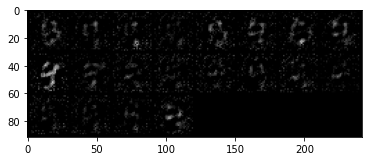

In [42]:
net.to('cpu')
net.trans = net.trans.to('cpu')

view_loader = torch.utils.data.DataLoader(trainsets[8], batch_size=20,
                                          shuffle=True, num_workers=2)
# get some random training images
dataiter = iter(view_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(net(images).detach()))

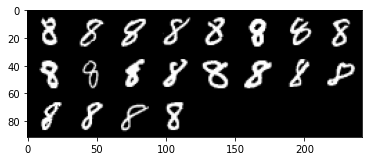

In [43]:
imshow(torchvision.utils.make_grid(images))

In [26]:
imshow(torchvision.utils.make_grid(net(images).detach()))

RuntimeError: mat1 dim 1 must match mat2 dim 0

In [ ]:
net.fc1.weight[14*14-10:14*14+10,14*14-10:14*14+10]

In [ ]:
print(net.fc1.weight.det())

In [ ]:
# torch.save(net.state_dict(), 'symmetry_net_projector.pkl')

In [ ]:
(net.fc1.weight.t() @ net.trans @ net.fc1.weight)[28*14,:] > 0

In [ ]:
(net.fc1.weight.t() @ net.fc1.weight)[28*14,:]

In [ ]:
imshow(net.fc1.weight[:, 9].view(1,28,28).detach())
imshow(net.fc1.weight[:, 10].view(1,28,28).detach())

In [ ]:
net.fc1.weight[:, 1].view(1,28,28).detach() * (torch.abs(net.fc1.weight[:, 1].view(1,28,28).detach())>0.01).double()


In [ ]:
net(inputs)

In [ ]:
net(inputs)